In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
x_data =[[0,0],[0,1],[1,0],[1,1]]
y_data =[[0],[1],[1],[0]]

In [3]:
x = torch.FloatTensor(x_data)
y = torch.FloatTensor(y_data)

In [4]:
## 수치 맞추는 것 잘 볼것
## 아래처럼 딥하고 와이드하게 잡는 방법이 있음
## 얼마나 딥하고 와이드하게 할지는 튜닝해봐야함
w1 = torch.empty([2,20], requires_grad=True)
w2 = torch.empty([20,1], requires_grad=True)
# w1 = torch.empty([2,100], requires_grad=True)
# w2 = torch.empty([100,50], requires_grad=True)
# w3 = torch.empty([50,1], requires_grad=True)
b1 = torch.empty([20], requires_grad=True)
b2 = torch.empty([1], requires_grad=True)
torch.nn.init.uniform_(w1)
torch.nn.init.uniform_(w2)
torch.nn.init.uniform_(b1)
torch.nn.init.uniform_(b2)

tensor([0.5093], requires_grad=True)

In [5]:
def cost():
    z1 = torch.matmul(x, w1) + b1
    hx1 = torch.sigmoid(z1)
    
    z = torch.matmul(hx1, w2) + b2
    hx = torch.sigmoid(z)
    cost_i = F.binary_cross_entropy(hx, y)
    
#     cost_i = F.binary_cross_entropy_with_logits(z2,y)    
    c = torch.mean(cost_i)
    return c

In [6]:
hist = []
optimizer = Adam( [w1,w2,b1,b2], lr=0.01)
for epoch in range(2000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    print(c.item())
    hist.append(c.item())

3.082526206970215
2.9924139976501465
2.9029107093811035
2.814032793045044
2.7257914543151855
2.6382150650024414
2.5513577461242676
2.465244770050049
2.3799121379852295
2.29541277885437
2.2117793560028076
2.129049301147461
2.0472779273986816
1.966521978378296
1.8868569135665894
1.808377742767334
1.731186866760254
1.6554068326950073
1.581178069114685
1.5086510181427002
1.4379992485046387
1.3694120645523071
1.303094744682312
1.2392700910568237
1.1781747341156006
1.1200542449951172
1.0651576519012451
1.0137301683425903
0.9660024046897888
0.9221807718276978
0.8824349045753479
0.8468858003616333
0.8155946731567383
0.7885542511940002
0.7656828165054321
0.7468228340148926
0.7317432761192322
0.7201475501060486
0.7116844654083252
0.7059633731842041
0.7025700211524963
0.7010835409164429
0.7010921835899353
0.7022067308425903
0.7040717601776123
0.7063735723495483
0.7088444232940674
0.7112657427787781
0.713466465473175
0.7153216004371643
0.716748058795929
0.7176997661590576
0.7181633114814758
0.7181

0.07542188465595245
0.07510103285312653
0.07478225976228714
0.07446538656949997
0.07415063679218292
0.07383786141872406
0.07352708280086517
0.07321823388338089
0.0729113295674324
0.07260638475418091
0.07230330258607864
0.07200215756893158
0.07170287519693375
0.07140547037124634
0.07110989093780518
0.07081616669893265
0.07052426040172577
0.07023420929908752
0.06994595378637314
0.06965944170951843
0.0693746954202652
0.06909170746803284
0.06881040334701538
0.06853090226650238
0.06825307756662369
0.0679769292473793
0.0677025318145752
0.06742975115776062
0.06715857982635498
0.066889189183712
0.06662128120660782
0.06635501980781555
0.06609043478965759
0.06582742184400558
0.06556595861911774
0.06530606001615524
0.0650477260351181
0.06479093432426453
0.0645357072353363
0.06428196281194687
0.06402970105409622
0.06377897411584854
0.06352968513965607
0.06328191608190536
0.06303561478853226
0.06279071420431137
0.06254728138446808
0.06230529770255089
0.06206466257572174
0.06182551011443138
0.061587

0.014784913510084152
0.014757038094103336
0.01472928375005722
0.014701532199978828
0.014673901721835136
0.014646331779658794
0.01461890060454607
0.014591468498110771
0.014564160257577896
0.014536896720528603
0.01450967974960804
0.014482584781944752
0.014455565251410007
0.014428608119487762
0.014401712454855442
0.014374892227351665
0.014348119497299194
0.014321437105536461
0.014294832944869995
0.014268333092331886
0.014241896569728851
0.014215489849448204
0.014189159497618675
0.014162937179207802
0.014136774465441704
0.014110644347965717
0.014084604568779469
0.014058642089366913
0.014032755047082901
0.01400691457092762
0.013981195166707039
0.013955477625131607
0.013929850421845913
0.013904314488172531
0.01387881115078926
0.013853399083018303
0.013828092254698277
0.013802817091345787
0.013777557760477066
0.013752434402704239
0.013727358542382717
0.01370234228670597
0.013677388429641724
0.013652495108544827
0.013627678155899048
0.013602938503026962
0.013578243553638458
0.01355363987386226

0.00558286439627409
0.005575818009674549
0.005568801891058683
0.00556175597012043
0.005554785020649433
0.005547783803194761
0.005540812853723764
0.005533857271075249
0.005526886321604252
0.00551994564011693
0.005513019859790802
0.005506064277142286
0.005499183665961027
0.0054923174902796745
0.005485407076776028
0.0054785567335784435
0.005471706390380859
0.0054648257791996
0.005457990802824497
0.005451155360788107
0.0054443650878965855
0.005437514744699001
0.0054307845421135426
0.005423994269222021
0.005417234264314175
0.005410473793745041
0.005403729155659676
0.005397014319896698
0.0053902543149888515
0.005383539479225874
0.005376839078962803
0.005370199680328369
0.005363499745726585
0.005356830079108477
0.005350160412490368
0.005343535915017128
0.005336910951882601
0.005330301355570555
0.005323676858097315
0.0053170970641076565
0.005310487933456898
0.0053039235062897205
0.005297359079122543
0.005290824454277754
0.005284230224788189
0.005277755670249462
0.005271206609904766
0.005264702

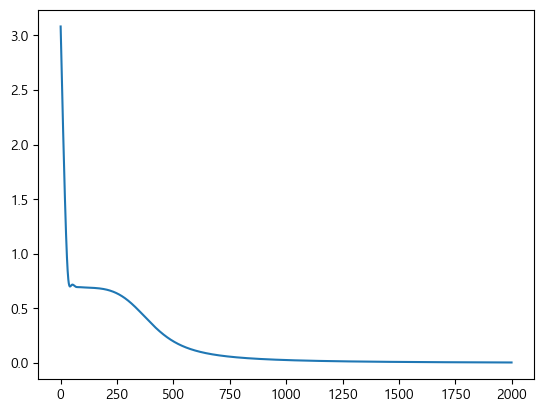

In [7]:
plt.plot(hist)
plt.show()

In [8]:
w1

tensor([[-6.4242,  7.9596, -6.6433,  3.5080,  7.7618,  0.2453,  7.6509,  3.6037,
          7.5546, -0.0833,  2.6401, -1.2011,  5.2190, -0.5572, -6.6522, -0.0963,
          4.3492, -1.2820, -1.1320,  2.5166],
        [ 7.6189, -6.6120,  7.6193,  3.5083, -6.6553, -2.5950, -6.5070,  3.5887,
         -6.2033, -2.3397,  2.6192, -1.5012,  5.2069, -1.7295,  7.7394, -1.8492,
          4.3888, -1.4953, -1.4284,  2.5277]], requires_grad=True)

In [9]:
w2

tensor([[-2.1402],
        [-2.5830],
        [-2.6627],
        [ 1.2760],
        [-2.2130],
        [ 0.8807],
        [-2.3372],
        [ 1.6643],
        [-2.6641],
        [ 0.7690],
        [ 1.2170],
        [ 1.4859],
        [ 2.7911],
        [ 1.1479],
        [-2.8468],
        [ 1.4813],
        [ 1.4466],
        [ 0.8863],
        [ 1.4705],
        [ 0.9178]], requires_grad=True)

In [10]:
b1

tensor([ 3.0527,  3.1813,  3.2814, -0.1239,  3.2194,  0.7245,  3.1238, -0.3095,
         2.9439,  1.0151,  0.5362,  1.8360, -1.5331,  1.2796,  3.2623,  0.7462,
        -0.8633,  1.8998,  1.7291,  0.8091], requires_grad=True)

In [11]:
b2

tensor([0.8494], requires_grad=True)

In [12]:
def hxFn(xd):
    xd = torch.FloatTensor(xd)
    z1 = torch.matmul(xd, w1) + b1
    hx1 = torch.sigmoid(z1)
    
    z = torch.matmul(hx1, w2) + b2
    hx = torch.sigmoid(z)
    return (hx.detach().numpy() > 0.5) + 0

In [13]:
hxFn(x) # 4x2 2x20 (w2) = 4x20 20x1 = 4x1

array([[0],
       [1],
       [1],
       [0]])